# Import Statements

We import there the needed library and have a look at the dataframe

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
import seaborn as sns
from collections import defaultdict
%matplotlib inline


df = pd.read_csv('./survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,19102.000000,16102.000000,15253.000000,7721.000000,13452.000000,5009.000000,818.000000
mean,9551.500000,7.343932,7.000721,3.685922,8.357865,58341.398571,32231.521687
std,5514.416757,1.919330,2.128648,7.330691,1.405546,40753.384986,28543.877274
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4776.250000,6.000000,6.000000,0.000000,8.000000,27956.989247,4716.459735
50%,9551.500000,8.000000,7.000000,1.000000,8.000000,51612.903226,29784.946237
75%,14326.750000,9.000000,8.000000,3.000000,9.000000,83333.333333,50000.000000
max,19102.000000,10.000000,10.000000,40.000000,10.000000,195000.000000,120000.000000


# Are non-programming professionals biased toward what they should be doing to become a data scientist?

We first clean here the data in order to count separately the occurence of each method of education

In [3]:
def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of ed types
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the ed type is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

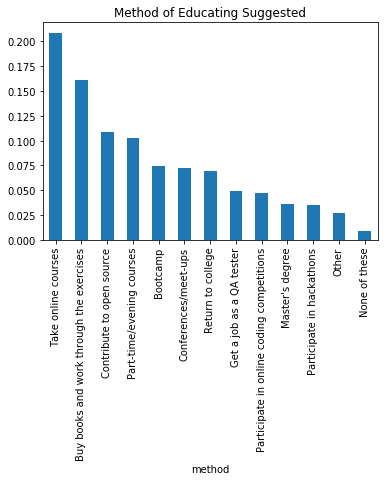

In [4]:
possible_vals = ["Take online courses", "Buy books and work through the exercises", 
                 "None of these", "Part-time/evening courses", "Return to college",
                 "Contribute to open source", "Conferences/meet-ups", "Bootcamp",
                 "Get a job as a QA tester", "Participate in online coding competitions",
                 "Master's degree", "Participate in hackathons", "Other"]

def clean_and_plot(df, title='Method of Educating Suggested', plot=True):
    '''
    INPUT 
        df - a dataframe holding the CousinEducation column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the CousinEducation column.
    '''
    study = df['CousinEducation'].value_counts().reset_index()
    study.rename(columns={'index': 'method', 'CousinEducation': 'count'}, inplace=True)
    study_df = total_count(study, 'method', 'count', possible_vals)

    study_df.set_index('method', inplace=True)
    if plot:
        (study_df/study_df.sum()).plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()
    props_study_df = study_df/study_df.sum()
    return props_study_df
    
props_df = clean_and_plot(df)

We want to deep dive in the different types of professional

In [5]:
df["Professional"].value_counts()

Professional developer                                  13774
Student                                                  2821
Professional non-developer who sometimes writes code     1782
None of these                                             368
Used to be a professional developer                       357
Name: Professional, dtype: int64

We create a function called not_developer in order to differentiate people that are or were professional developpers from the reste of the population

In [6]:
def not_developer(professional_str):
    '''
    INPUT
        professional_str - a string of one of the values from the Professional column
    
    OUTPUT
        return 1 if the string is in ("Student", "Professional non-developer who sometimes writes code", "None of these")
        return 0 otherwise
    
    '''
    if professional_str in ("Student", "Professional non-developer who sometimes writes code", "None of these"):
        return 1
    else:
        return 0

I first want to see what % of the respondents are not professional developers. It is 26% of them.

In [7]:
df['NotDeveloper'] = df["Professional"].apply(not_developer)
not_developer_perc = df['NotDeveloper'].mean()
print(not_developer_perc)

0.260234530416


In [8]:
not_developer_1 = df[df['NotDeveloper'] == 1] # Subset df to only those who are not professional developpers
developer_0 = df[df['NotDeveloper'] == 0] # Subset df to only those who are or were professional developpers

print(not_developer_1['NotDeveloper'][:5]) #Assure it looks like what you would expect
print(developer_0['NotDeveloper'][:5]) #Assure it looks like what you would expect

0    1
1    1
3    1
5    1
6    1
Name: NotDeveloper, dtype: int64
2    0
4    0
7    0
8    0
9    0
Name: NotDeveloper, dtype: int64


In [9]:
#We plot here the bias on learning methods between developers and non developers

not_developer_1_perc = clean_and_plot(not_developer_1, 'Not Developer', plot=False)
developer_0_perc = clean_and_plot(developer_0, 'Professional or Former Professional Developer', plot=False)

comp_df = pd.merge(not_developer_1_perc, developer_0_perc, left_index=True, right_index=True)
comp_df.columns = ['not_developer_1_perc', 'developer_0_perc']
comp_df['Diff_HigherEd_Vals'] = comp_df['not_developer_1_perc'] - comp_df['developer_0_perc']
comp_df.style.bar(subset=['Diff_HigherEd_Vals'], align='mid', color=['#d65f5f', '#5fba7d'])

,not_developer_1_perc,developer_0_perc,Diff_HigherEd_Vals
method,,,
Take online courses,0.214666,0.207259,0.00740717
Buy books and work through the exercises,0.156698,0.162349,-0.0056507
Contribute to open source,0.110406,0.108701,0.00170461
Part-time/evening courses,0.100983,0.103141,-0.00215745
Return to college,0.0753789,0.0672736,0.00810533
Bootcamp,0.0733306,0.0739949,-0.000664265
Participate in online coding competitions,0.0620647,0.0425272,0.0195375
Conferences/meet-ups,0.0610406,0.0757668,-0.0147263
Master's degree,0.040762,0.0350116,0.00575037


# Do French people see things differently?

I want see if there is a culture bias regarding education. I first have a look at all the countries.

In [10]:
df["Country"].value_counts()

United States                     4364
India                             1557
United Kingdom                    1424
Germany                           1337
Canada                             874
Poland                             694
France                             522
Australia                          399
Netherlands                        373
Israel                             338
Russian Federation                 330
Spain                              312
Italy                              304
Sweden                             267
Brazil                             259
Romania                            251
Switzerland                        242
Slovenia                           190
Austria                            190
Iran                               174
Czech Republic                     167
Pakistan                           160
Ukraine                            148
Turkey                             146
Belgium                            138
Ireland                  

We create a function called french in order to differentiate people that are French from the reste of the world (ROTW)

In [11]:
def french(country_str):
    '''
    INPUT
        country_str - a string of one of the values from the Country column
    
    OUTPUT
        return 1 if the string is in ("France")
        return 0 otherwise
    
    '''
    if country_str in ("France"):
        return 1
    else:
        return 0

I first want to see what % of the respondents are French. It is roughly 3%.

In [12]:
df['France'] = df["Country"].apply(french)
french_perc = df['France'].mean()
print(french_perc)

0.0273269814679


In [13]:
French_1 = df[df['France'] == 1] # Subset df to only those who are not professional developpers
ROTW_0 = df[df['France'] == 0] # Subset df to only those who are or were professional developpers

print(French_1['France'][:5]) #Assure it looks like what you would expect
print(ROTW_0['France'][:5]) #Assure it looks like what you would expect

9      1
75     1
158    1
199    1
203    1
Name: France, dtype: int64
0    0
1    0
2    0
3    0
4    0
Name: France, dtype: int64


In [14]:
#We plot here the bias on learning methods between French people and Rest Of The World

French_1_perc = clean_and_plot(French_1, 'France', plot=False)
ROTW_0_perc = clean_and_plot(ROTW_0, 'Rest Of The World', plot=False)

comp_df = pd.merge(French_1_perc, ROTW_0_perc, left_index=True, right_index=True)
comp_df.columns = ['French_1_perc', 'ROTW_0_perc']
comp_df['Diff_HigherEd_Vals'] = comp_df['French_1_perc'] - comp_df['ROTW_0_perc']
comp_df.style.bar(subset=['Diff_HigherEd_Vals'], align='mid', color=['#d65f5f', '#5fba7d'])

,French_1_perc,ROTW_0_perc,Diff_HigherEd_Vals
method,,,
Take online courses,0.218695,0.208694,0.0100009
Buy books and work through the exercises,0.151675,0.161307,-0.009632
Contribute to open source,0.123457,0.108699,0.014758
Part-time/evening courses,0.0970018,0.1028,-0.00579791
Bootcamp,0.0828924,0.0735941,0.0092983
Conferences/meet-ups,0.0811287,0.0721435,0.00898523
Return to college,0.0793651,0.0688555,0.0105096
Master's degree,0.0652557,0.0355399,0.0297159
Participate in online coding competitions,0.0352734,0.0473381,-0.0120648


In [15]:
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no Career Satisfaction
    2. Create X as all the columns that are not the Career Satisfaction column
    3. Create y as the Career Satisfaction column
    4. Drop the CareerSatisfaction, Respondent, and the ExpectedSalary columns from X
    5. For each numeric variable in X, fill the column with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
    # Drop rows with missing salary values
    df = df.dropna(subset=['CareerSatisfaction'], axis=0)
    y = df['CareerSatisfaction']
    
    #Drop respondent, expected salary and Career Satisfaction columns
    df = df.drop(['Respondent', 'ExpectedSalary', 'CareerSatisfaction'], axis=1)
    
    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)
        
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    X = df
    
    
    return X, y
    
#Use the function to create X and y
X, y = clean_data(df)    

In [17]:

   #Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

#Score using your model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

    
#Print training and testing score
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

The rsquared on the training data was -283.2117729866457.  The rsquared on the test data was -2.8866220846868285e+27.
